# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [13]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [14]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-07-13 00:00:00')

In [15]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-07-12 00:00:00')

In [16]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [17]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,12910357
Deaths,569128
Recovered,7116957
Active,5224272


In [18]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(12, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,3304942,135205,1006326,2163411,2020-07-13 04:43:04,38.327657,-91.743556
Brazil,1864681,72100,1264843,527738,2020-07-13 04:43:04,-12.669522,-48.480493
India,878254,23174,553471,301609,2020-07-13 04:43:04,23.356511,82.081064
Russia,726036,11318,500208,214510,2020-07-13 04:43:04,54.546312,62.120860
Peru,326326,11870,217111,97345,2020-07-13 04:43:04,-10.637324,-75.277744


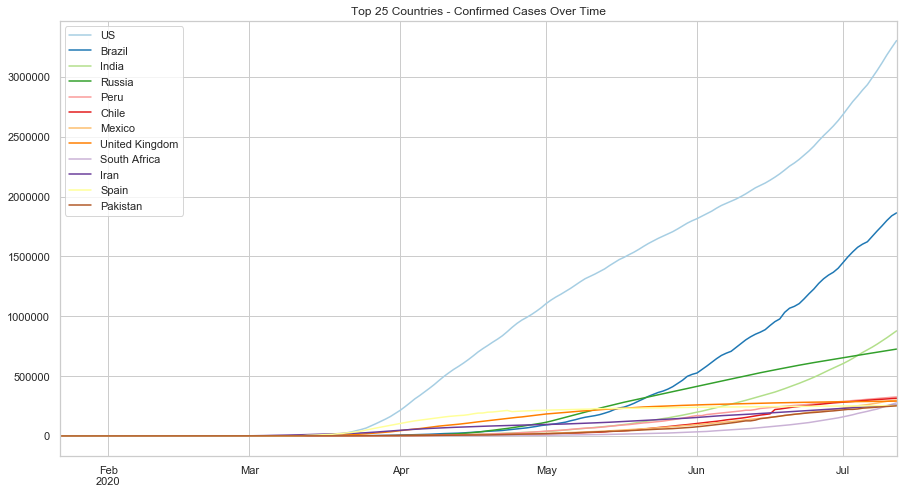

In [19]:
# Plot the top 25 countries confirmed infections over time
jh_hist_countries_cases[top_countries.index].plot(figsize=(15,8), title="Top 25 Countries - Confirmed Cases Over Time")

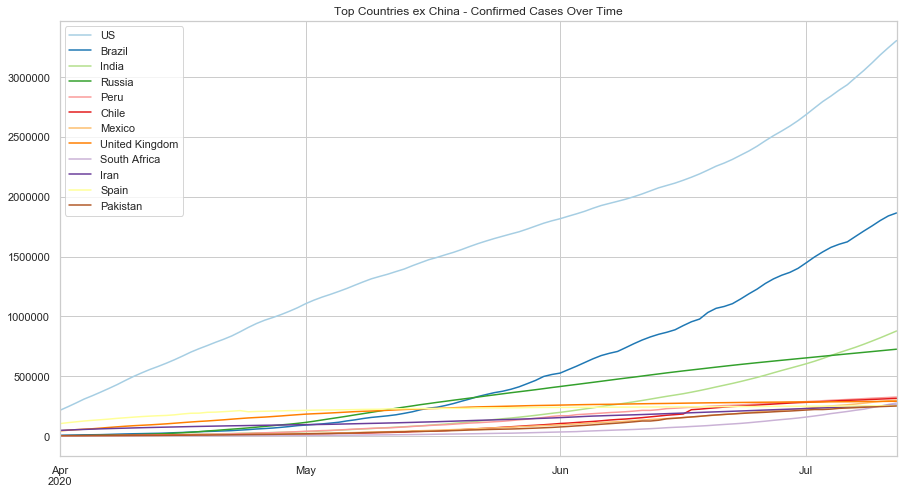

In [20]:
# Same chart but excluding China and zoomed in
jh_hist_countries_cases[top_countries.index].loc[zoom_date2:, top_countries.index != 'China'].plot(figsize=(15,8), title="Top Countries ex China - Confirmed Cases Over Time")

### US State Level

In [21]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(12, 'Confirmed')
top_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,401706,32350,0,369356,2020-07-13 04:43:04,42.671593,-75.579694
California,324543,7051,0,317492,2020-07-13 04:43:04,37.778248,-120.728666
Florida,269811,4242,0,265569,2020-07-13 04:43:04,28.940755,-82.700744
Texas,262762,3216,0,259546,2020-07-13 04:43:04,31.648720,-98.600835
New Jersey,175298,15525,0,159773,2020-07-13 04:43:04,40.286441,-74.622450
Illinois,155048,7388,0,147660,2020-07-13 04:43:04,39.843618,-89.178330
Arizona,122467,2237,0,120230,2020-07-13 04:43:04,33.675904,-111.463232
Georgia,116935,3003,0,113932,2020-07-13 04:43:04,32.808532,-83.577430
Massachusetts,111597,8325,0,103272,2020-07-13 04:43:04,42.176400,-71.577050


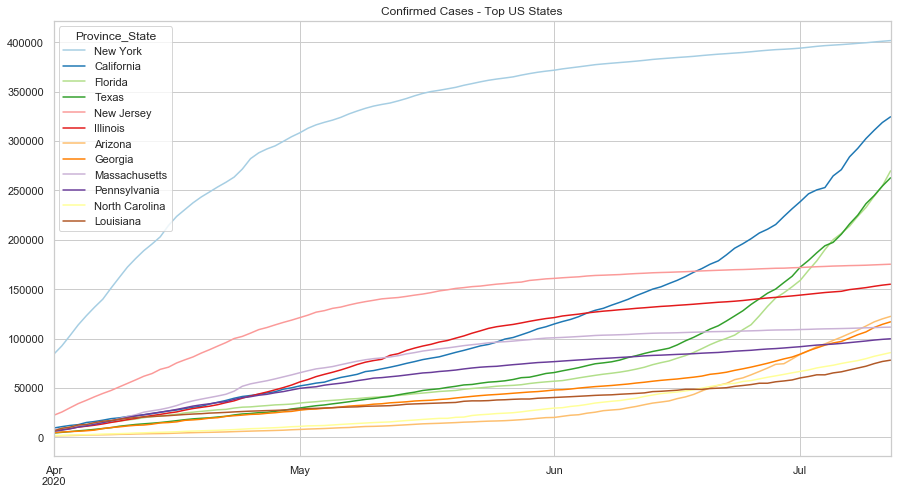

In [22]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

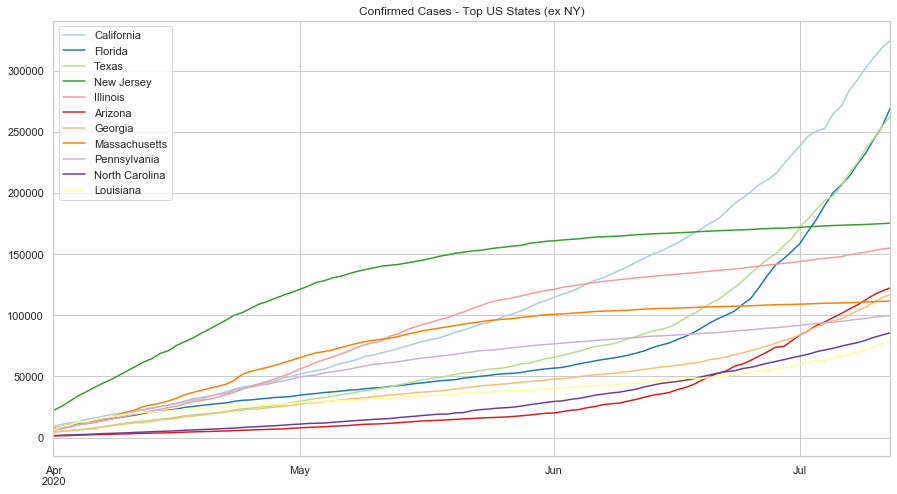

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

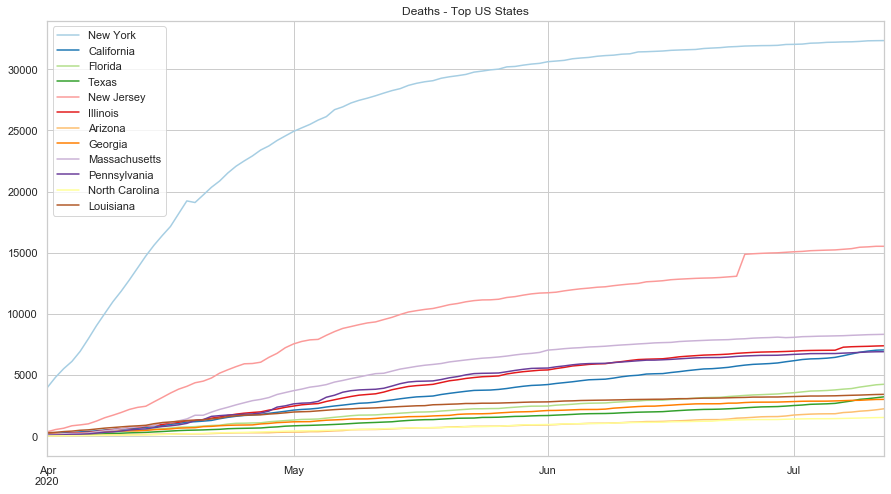

In [24]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

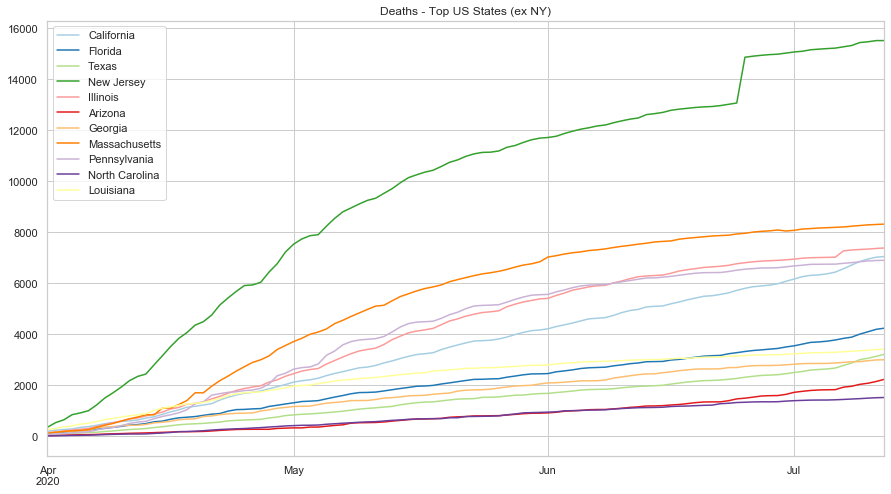

In [25]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [26]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(12, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,24483,1916,0,22567,2020-07-13 04:43:04,42.486077,-71.390492,25017.0
Suffolk,20301,1020,0,19281,2020-07-13 04:43:04,42.327951,-71.078504,25025.0
Essex,16469,1137,0,15332,2020-07-13 04:43:04,42.668763,-70.946872,25009.0
Worcester,12648,958,0,11690,2020-07-13 04:43:04,42.350270,-71.904934,25027.0
Norfolk,9462,958,0,8504,2020-07-13 04:43:04,42.160731,-71.205304,25021.0


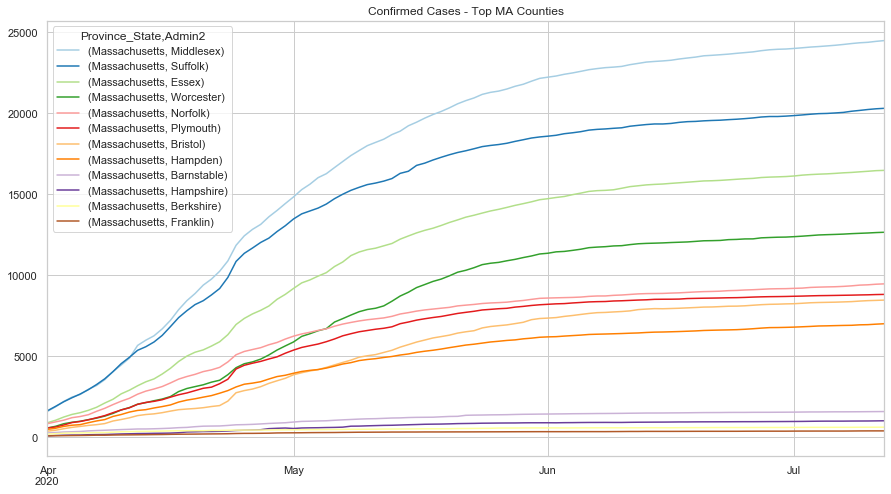

In [27]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

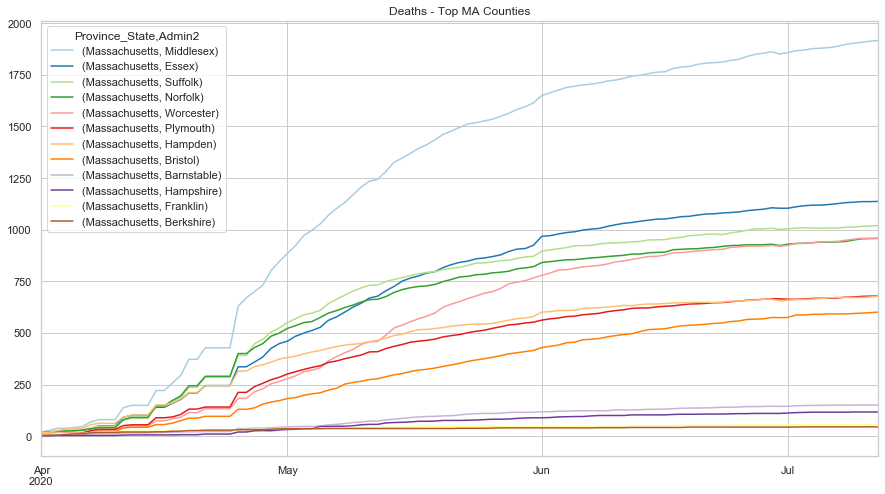

In [28]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [29]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(12, 'Confirmed')
top_counties_CA.head(5)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,133549,3809,0,129740,2020-07-13 04:43:04,34.308284,-118.228241,6037.0
Riverside,24765,537,0,24228,2020-07-13 04:43:04,33.743150,-115.993358,6065.0
Orange,24715,423,0,24292,2020-07-13 04:43:04,33.701475,-117.764600,6059.0
San Diego,19371,422,0,18949,2020-07-13 04:43:04,33.034846,-116.736533,6073.0
San Bernardino,19043,306,0,18737,2020-07-13 04:43:04,34.840603,-116.177469,6071.0


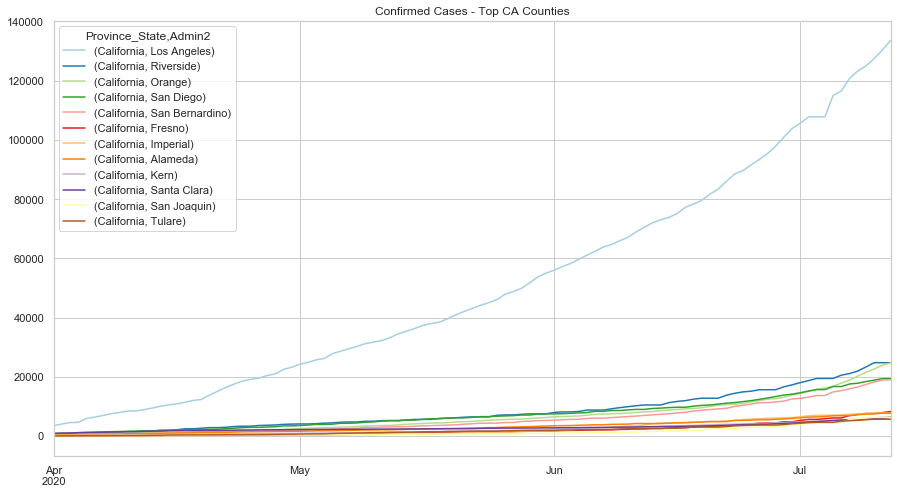

In [30]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(12).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

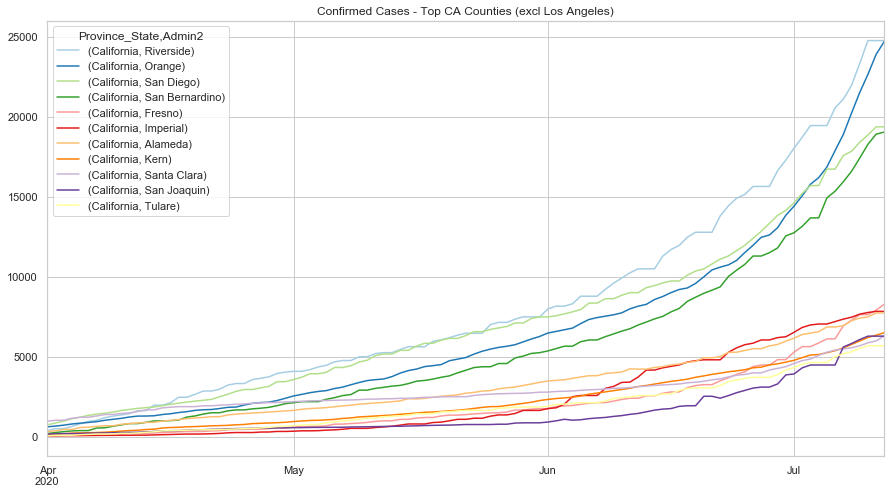

In [31]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

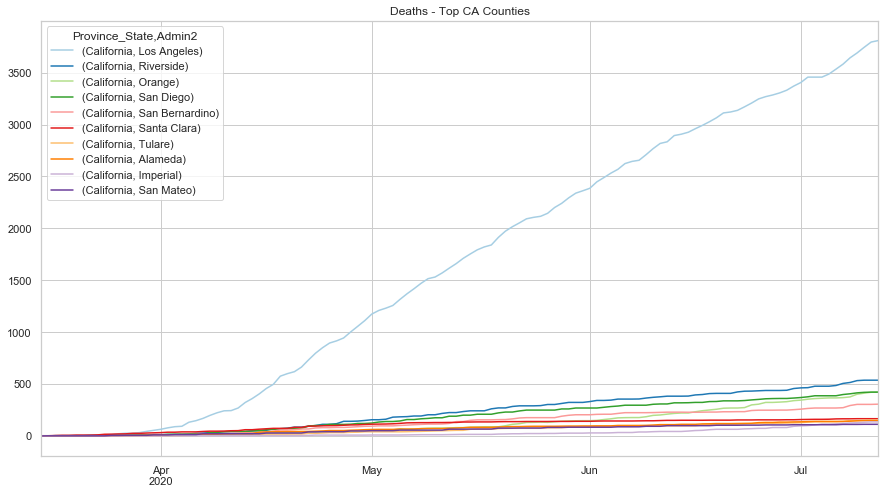

In [32]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(10).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

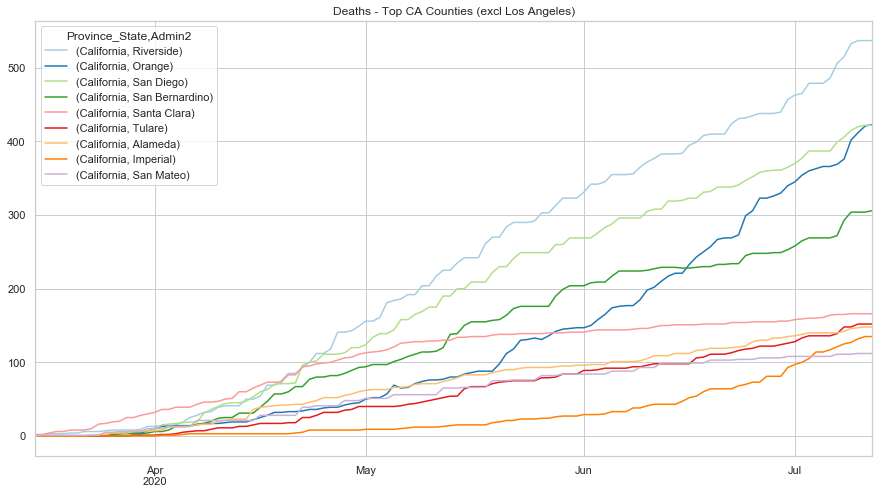

In [33]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [34]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [35]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [36]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [37]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [38]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",24715,423,0,24292,2020-07-13 04:43:04,33.701475,-117.764600
"(Massachusetts, Middlesex)",24483,1916,0,22567,2020-07-13 04:43:04,42.486077,-71.390492
"(Massachusetts, Suffolk)",20301,1020,0,19281,2020-07-13 04:43:04,42.327951,-71.078504
"(Massachusetts, Essex)",16469,1137,0,15332,2020-07-13 04:43:04,42.668763,-70.946872
"(Massachusetts, Bristol)",8460,601,0,7859,2020-07-13 04:43:04,41.792284,-71.108722
Costa Rica,7596,30,2239,5327,2020-07-13 04:43:04,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [39]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [40]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [41]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-07-05          16854         24153   19985  16254    8321       4996
2020-07-06          17882         24193   20014  16283    8331       5241
2020-07-07          18892         24243   20048  16318    8348       5486
2020-07-08          20225         24300   20120  16342    8365       5836
2020-07-09          21517         24348   20172  16379    8399       6485
2020-07-10          22650         24377   20228  16414    8426       6845
2020-07-11          23901         24436   20272  16452    8442       7231
2020-07-12          24715         24483   20301  16469    8460       7596

In [42]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

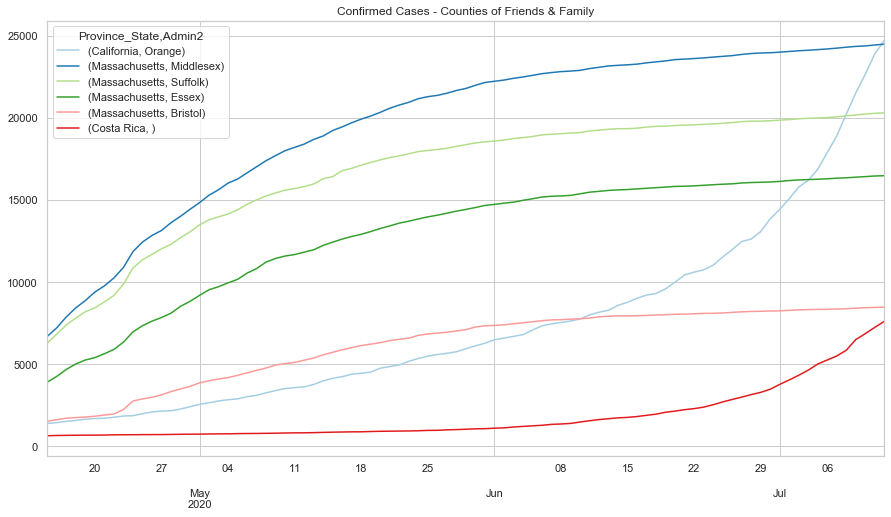

In [43]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date3:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [44]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [45]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [46]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [47]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-07-05            366          1879    1007  1119     590          7   
2020-07-06            366          1882    1008  1122     592          7   
2020-07-07            369          1888    1008  1126     592          7   
2020-07-08            376          1897    1012  1131     592          7   
2020-07-09            402          1903    1013  1133     594          7   
2020-07-10            412          1908    1016  1136     596          7   
2020-07-11            421          1913    1018  1136     598          7   
2020-07-12            423          1916    1020  1137     601          7   

Province_State Costa Rica  
Admin2                     
2020-07-05             19  
2020-07-06             23  
2020-07-07             23  
2020-07-08             25  
2020-07-09             25  
2020-07-10             26  
2020-07-11             28  
2020-07-12             30

In [48]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

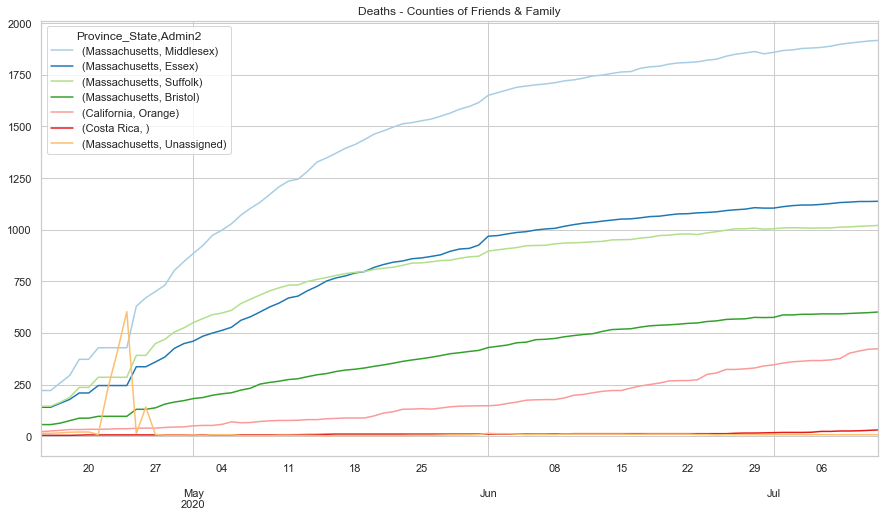

In [49]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date3:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))